In [1]:

from autodepgraph.graph import Graph
from autodepgraph import visualization as vis
G = Graph('G')


G.add_node('A')
G.add_node('B')
G.B.dependencies(['A'])
G.add_node('C')
G.C.dependencies(['B'])
G.add_node('D')
G.D.dependencies(['C'])
G.add_node('E')
G.E.dependencies(['B'])
G.add_node('F')
G.F.dependencies(['E'])
G.add_node('Algo')
G.Algo.dependencies(['F','D'])

In [4]:
from qcodes.tests.instrument_mocks import DummyInstrument

In [4]:
nxG = vis.snapshot_to_nxGraph(G.snapshot())

G.A.state('good')

G.B.state('good')

G.C.state('active')

G.D.state('needs calibration')

In [2]:
from importlib import reload

In [125]:
import pyqtgraph as pg
from pyqtgraph.Qt import QtCore, QtGui
import numpy as np

from autodepgraph.pg_visualization import pg_GraphItem as pgG
reload(pgG)
# Enable antialiasing for prettier plots
pg.setConfigOptions(antialias=True)

w = pg.GraphicsWindow()
w.setBackground('w')
w.setWindowTitle('pyqtgraph example: DirectedGraphItem')
v = w.addViewBox()
v.setAspectLocked()

g = pgG.DirectedGraphItem()
# g = pg.GraphItem()
v.addItem(g)

# Get the node positions 
pos = vis.nx.nx_agraph.graphviz_layout(nxG)
pos_p = np.array(list(pos.values()))

# Convert the adjacency to integers 
adj = []
for child, parent in nxG.edges():
    child_idx = nxG.nodes().index(child)
    parent_idx = nxG.nodes().index(parent)
    adj.append([child_idx, parent_idx])
adj = np.array(adj)

## Define the symbol to use for each node
symbols = ['o']*len(pos_p)

# Get colors like states 
cm = vis.get_state_col_map(G.snapshot())
colors_list = [pg.mkBrush(cm[node]) for node in nxG.nodes()]

g.setData(pos=np.array(pos_p), adj=adj, size=20, symbol=symbols,
          labels=list(nxG.nodes()), pen=(60, 60, 60),
          symbolBrush=colors_list, pxMode=False)



## Start Qt event loop unless running in interactive mode or using pyside.
if __name__ == '__main__':
    import sys
    if (sys.flags.interactive != 1) or not hasattr(QtCore, 'PYQT_VERSION'):
        QtGui.QApplication.instance().exec_()


In [66]:
pg.ArrowItem?


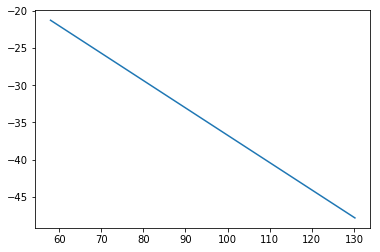

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot([57.956, 130.23],[-21.3, -47.841])

In [78]:
ch = 57.956+1j*-21.3
par = 130.23+1j*-47.841

In [86]:
vec = (par-ch)

In [98]:
(vec)


AttributeError: module 'numpy' has no attribute 'norm'

In [87]:
np.rad2deg(np.angle(vec))

-20.164623273581711

In [52]:
np.rad2deg(np.arctan((57.956 - 130.23)/(-21.3+47.841)))

-69.835376726418303